## **Importing necessary package**

In [1]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **1. Data Exploratory:**



## **1-a. Variables/ Data fields**

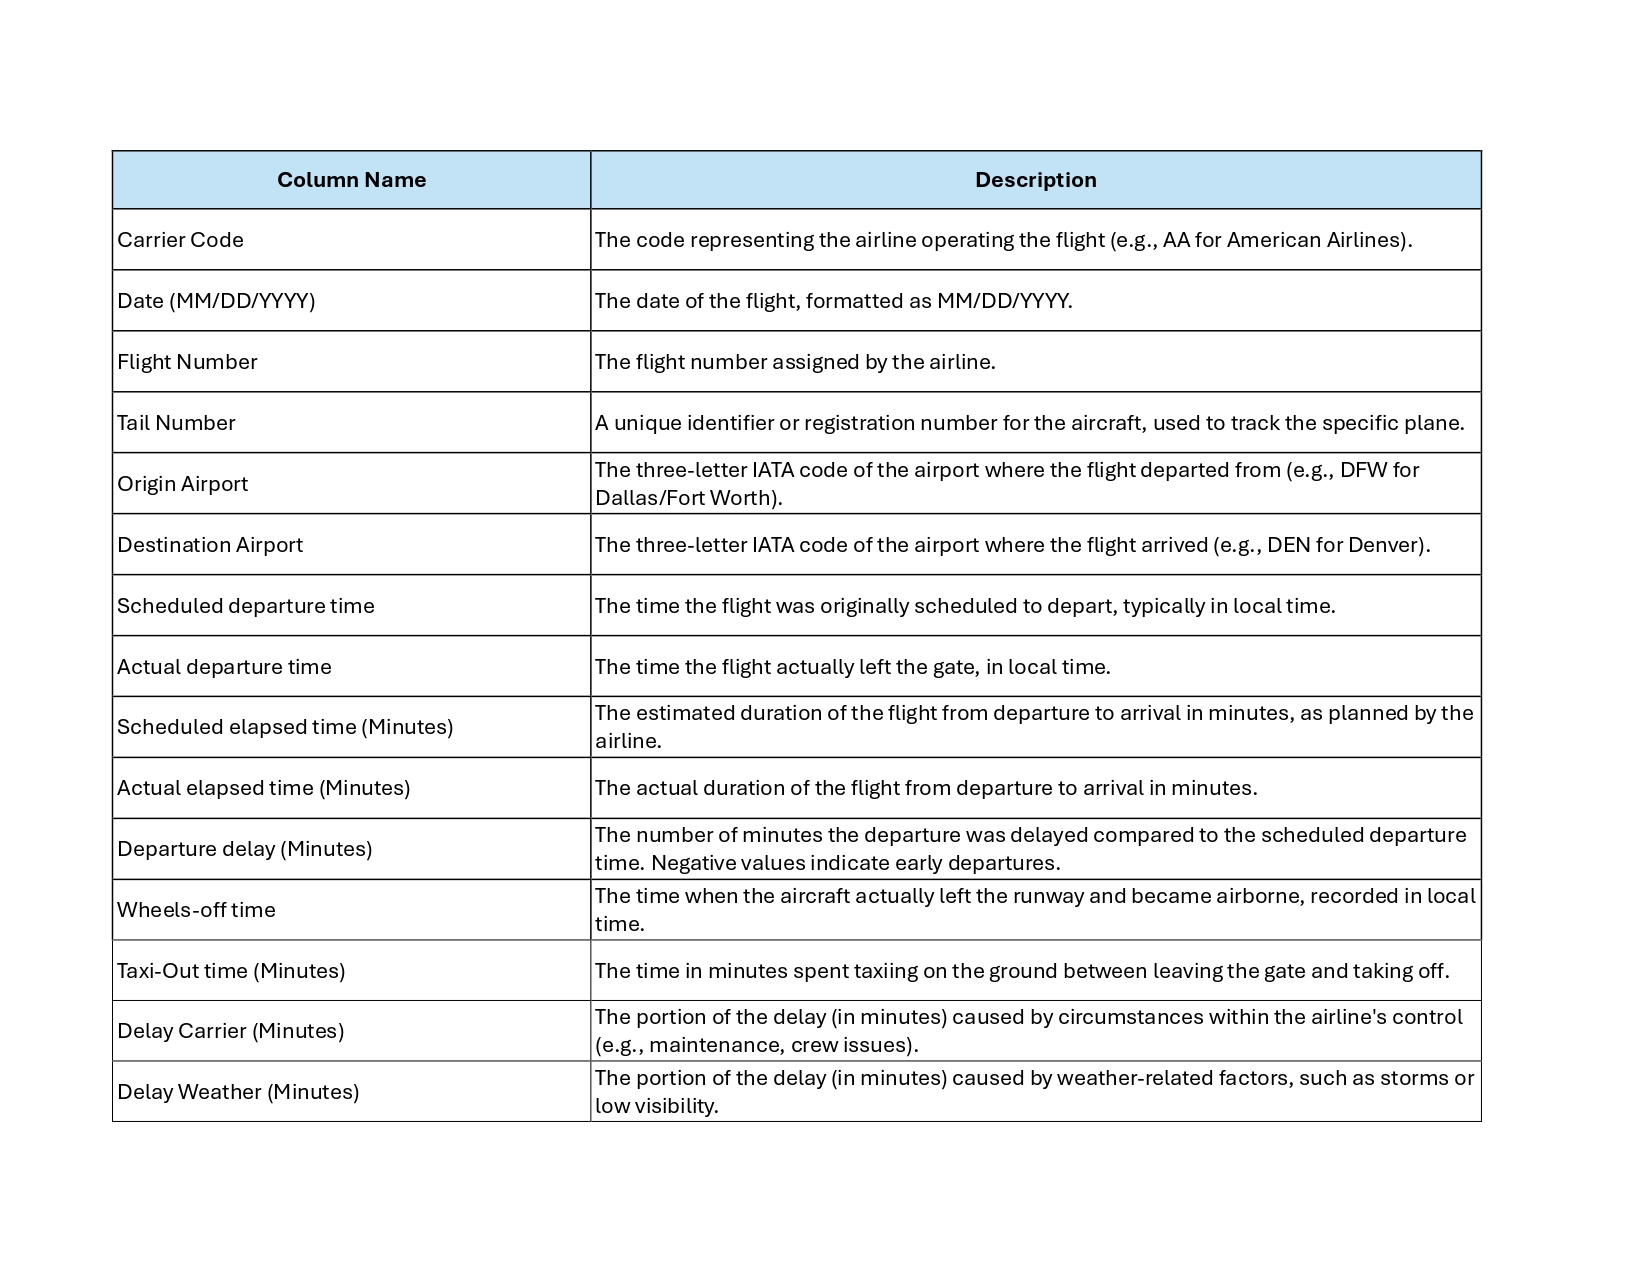

In [ ]:
Image('/content/drive/MyDrive/capstone1/All_Airlines/feature image 1.jpg')

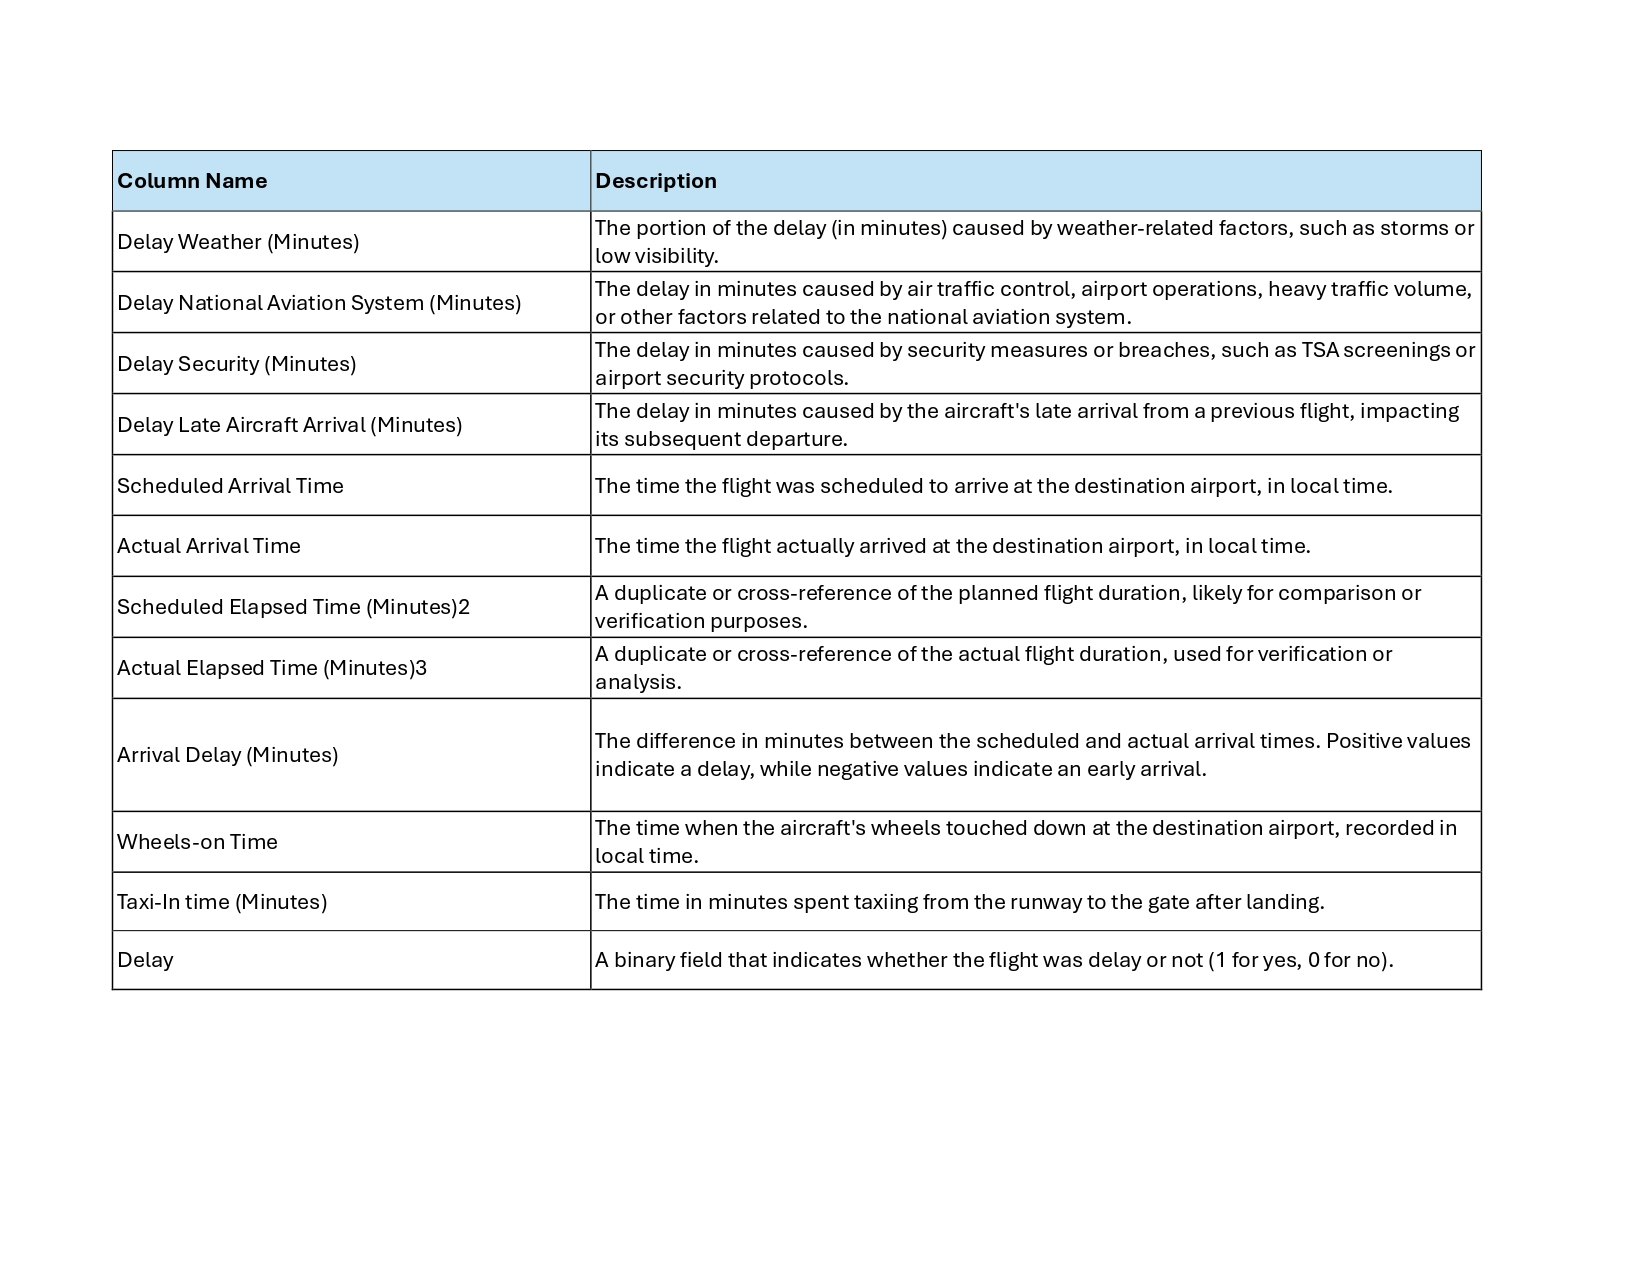

In [ ]:
Image('/content/drive/MyDrive/capstone1/All_Airlines/feature image 2.jpg')

## **1-b. reviewing the dataset**

In [4]:
# retreving data

df = pd.read_csv('all_airlines.csv')
df.head().T

,0,1,2,3,4
Carrier Code,AA,AA,AA,AA,AA
Date (MM/DD/YYYY),01/01/2014,01/01/2014,01/01/2014,01/01/2014,01/01/2014
Flight Number,232.0,314.0,322.0,338.0,356.0
Tail Number,N013AA,N003AA,N008AA,N541AA,N530AA
Origin Airport,ATL,ATL,ATL,ATL,ATL
Destination Airport,DFW,DFW,DFW,DFW,DFW
Scheduled departure time,19:25,12:45,14:05,15:40,16:50
Actual departure time,19:24,13:07,14:02,15:36,16:44
Scheduled elapsed time (Minutes),145.0,145.0,155.0,150.0,155.0
Actual elapsed time (Minutes),140.0,133.0,144.0,145.0,148.0


In [8]:
df.shape

(376008, 25)

# **6. Baseline Model:**

In [ ]:
df_new = df.copy()

In [ ]:
# Proceeding with the sampled data for model training and prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Feature Engineering
# Selecting relevant features for regression
features = [
    "Carrier Code", "Flight Number", "Origin Airport", "Destination Airport",
    "Scheduled elapsed time (Minutes)", "Day", "Month", "Year", 'Delay Carrier (Minutes)', 'Taxi-Out time (Minutes)', 'Taxi-In time (Minutes)',
    'Departure delay (Minutes)', 'Delay Weather (Minutes)',
    'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)',
    'Delay Late Aircraft Arrival (Minutes)', 'Actual Elapsed Time (Minutes)'
]
target = "Arrival Delay (Minutes)"

# Encode categorical features
label_encoders = {}
for col in ["Carrier Code", "Origin Airport", "Destination Airport"]:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df_new[col])
    label_encoders[col] = le

# Splitting the dataset into train and test sets
X = df_new[features]
y = df_new[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a Regression Model
regressor = RandomForestRegressor(random_state=42, n_estimators=100)
regressor.fit(X_train, y_train)

# Step 3: Evaluate the Model
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

evaluation_results = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "R^2 Score": r2
}

evaluation_results

{'Mean Absolute Error (MAE)': 1.3030304130983936,
 'Mean Squared Error (MSE)': 11.68940251473591,
 'R^2 Score': 0.9065951247204128}

# **Feature Selection**

### Embedded

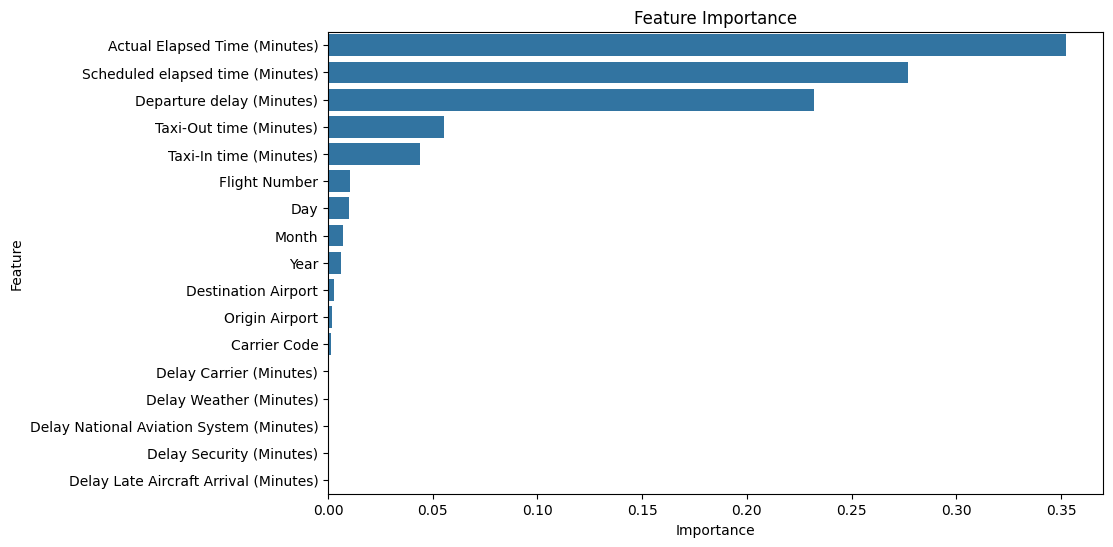

Feature Importances:


,Feature,Importance
16,Actual Elapsed Time (Minutes),0.352417
4,Scheduled elapsed time (Minutes),0.276686
11,Departure delay (Minutes),0.231886
9,Taxi-Out time (Minutes),0.055549
10,Taxi-In time (Minutes),0.043685
1,Flight Number,0.010468
5,Day,0.009908
6,Month,0.007090
7,Year,0.006247
3,Destination Airport,0.002875


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming 'regressor' and 'features' are already defined from the previous code

# Get feature importances
importances = regressor.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print feature importances in descending order
print("Feature Importances:")
feature_importances

### Filter

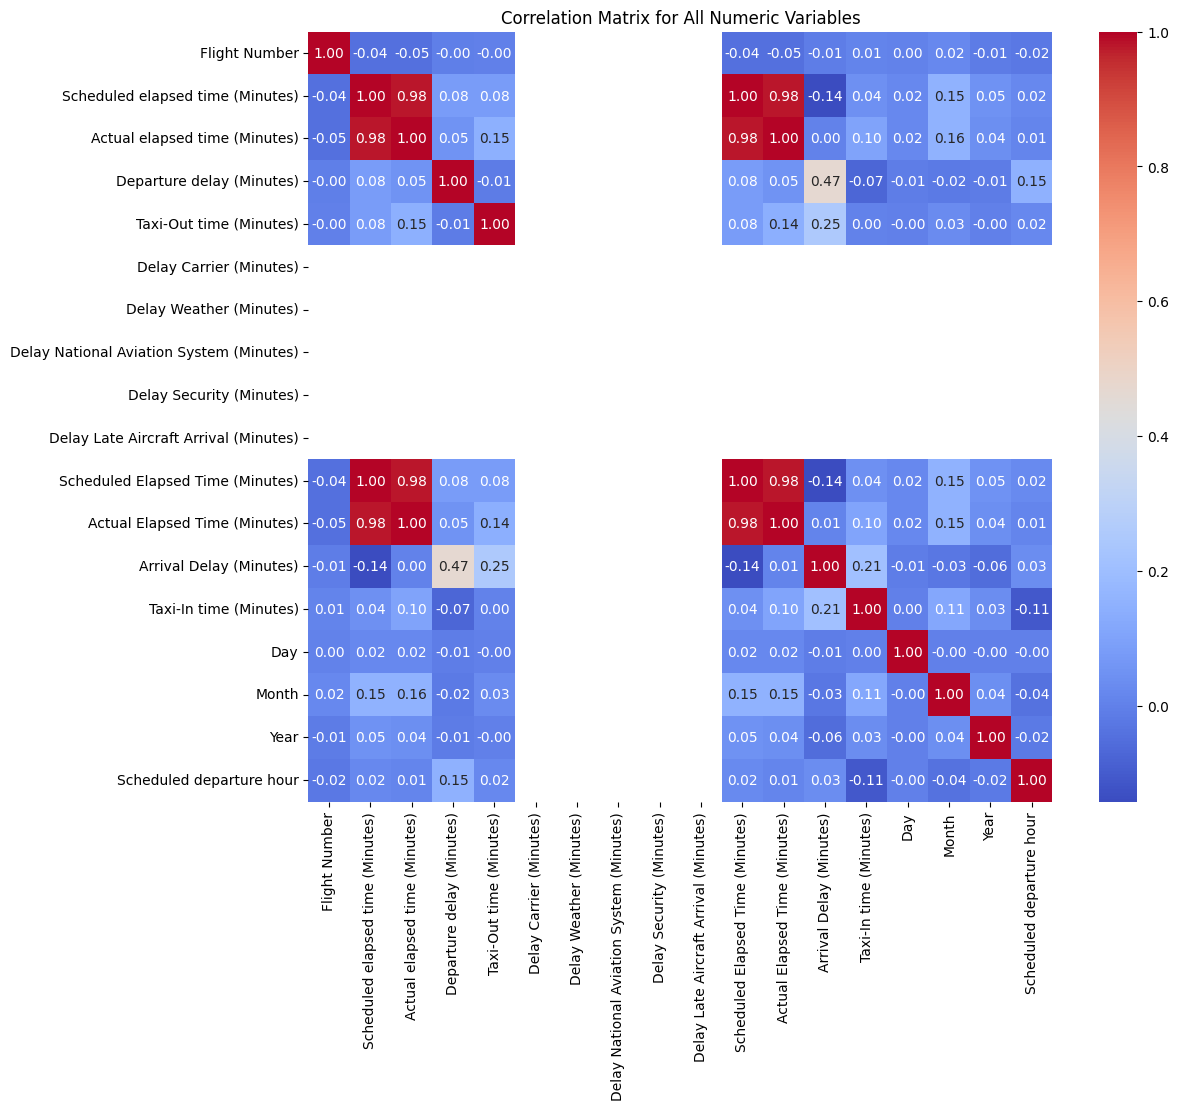

,Arrival Delay (Minutes)
Arrival Delay (Minutes),1.000000
Departure delay (Minutes),0.465900
Taxi-Out time (Minutes),0.254664
Taxi-In time (Minutes),0.207802
Scheduled departure hour,0.034214
Actual Elapsed Time (Minutes),0.008389
Actual elapsed time (Minutes),0.001550
Day,-0.009790
Flight Number,-0.011541
Month,-0.026352


In [ ]:
# Select only numeric columns
numeric_columns = df_new.select_dtypes(include=['float64', 'int64', 'int32'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix for All Numeric Variables")
plt.show()

# Focus on the correlation with "Arrival Delay (Minutes)"
arrival_delay_corr = correlation_matrix['Arrival Delay (Minutes)'].sort_values(ascending=False)
arrival_delay_corr

### Wrapper

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define feature columns
features = ["Day", "Month", "Year",'Carrier Code',
       'Origin Airport', 'Destination Airport',
       'Departure delay (Minutes)',
       'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Scheduled Elapsed Time (Minutes)', 'Actual Elapsed Time (Minutes)',
       'Taxi-In time (Minutes)']
target = "Arrival Delay (Minutes)"

# Splitting the dataset
X = df_new[features]
y = df_new[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of categorical columns
categorical_cols = ["Carrier Code", "Origin Airport", "Destination Airport"]

# Apply Label Encoding for Carrier Code (Binary)
label_encoders = {}
le = LabelEncoder()
X_train["Carrier Code"] = le.fit_transform(X_train["Carrier Code"])
X_test["Carrier Code"] = le.transform(X_test["Carrier Code"])
label_encoders["Carrier Code"] = le

# Apply Frequency Encoding for Origin and Destination Airports
for col in ["Origin Airport", "Destination Airport"]:
    freq_map = X_train[col].value_counts().to_dict()  # Compute frequency
    X_train[col] = X_train[col].map(freq_map)
    X_test[col] = X_test[col].map(freq_map)  # Use same mapping for test data




# Initialize Linear Regression Model
model = LinearRegression()

# Apply Recursive Feature Elimination (RFE) to select the top 10 features
rfe = RFE(model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train the model with selected features
model.fit(X_train_rfe, y_train)

# Model Predictions
y_pred = model.predict(X_test_rfe)

# Evaluate Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Extract selected feature names and coefficients
selected_features = np.array(X.columns)[rfe.support_]
feature_coefficients = model.coef_

# Create a DataFrame to display selected features with their coefficients
feature_importance_df = pd.DataFrame({
    "Feature": selected_features,
    "Coefficient": feature_coefficients
}).sort_values(by="Coefficient", ascending=False)

# Display evaluation metrics and feature importance
evaluation_results = {
    "Selected Features": selected_features.tolist(),
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "R^2 Score": r2
}

# Show the evaluation results
print(evaluation_results)

# Display feature coefficients
print("\nFeature Coefficients:")
print(feature_importance_df)

{'Selected Features': ['Day', 'Month', 'Year', 'Carrier Code', 'Origin Airport', 'Departure delay (Minutes)', 'Taxi-Out time (Minutes)', 'Scheduled Elapsed Time (Minutes)', 'Actual Elapsed Time (Minutes)', 'Taxi-In time (Minutes)'], 'Mean Absolute Error (MAE)': 0.6663710915374371, 'Mean Squared Error (MSE)': 8.248927653801115, 'R^2 Score': 0.9340864464439192}

Feature Coefficients:
                            Feature  Coefficient
8     Actual Elapsed Time (Minutes)     0.993070
5         Departure delay (Minutes)     0.957220
3                      Carrier Code     0.027107
6           Taxi-Out time (Minutes)     0.006722
1                             Month     0.002197
0                               Day     0.000277
4                    Origin Airport     0.000002
9            Taxi-In time (Minutes)    -0.007567
2                              Year    -0.009370
7  Scheduled Elapsed Time (Minutes)    -0.992802


# **Final Model after Feature Selection**

### RandomForest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

features = ["Day", "Month", "Year", "Taxi-Out time (Minutes)", "Taxi-In time (Minutes)",
            "Origin Airport", "Carrier Code", "Destination Airport",
            "Scheduled Elapsed Time (Minutes)",
            "Actual Elapsed Time (Minutes)",
            "Departure delay (Minutes)",
            "Scheduled departure hour"]
target = "Arrival Delay (Minutes)"

# Encode categorical features
label_encoders = {}
for col in ["Carrier Code", "Origin Airport", "Destination Airport"]:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df_new[col])
    label_encoders[col] = le

# Splitting the dataset into train and test sets
X = df_new[features]
y = df_new[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Random Forest Model
regressor = RandomForestRegressor(
    random_state=42,
    n_estimators=100,  # Increase trees for better learning
    max_depth=15,  # Allow deeper trees for more complex patterns
    min_samples_split=4,  # Slightly reduce min samples per split
    min_samples_leaf=2  # Slightly reduce min samples per leaf
)
regressor.fit(X_train, y_train)

# Evaluate the Model
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

evaluation_results = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "R^2 Score": r2
}

evaluation_results

{'Mean Absolute Error (MAE)': 1.4839106647110294,
 'Mean Squared Error (MSE)': 11.226335964594583,
 'R^2 Score': 0.9102952858969635}

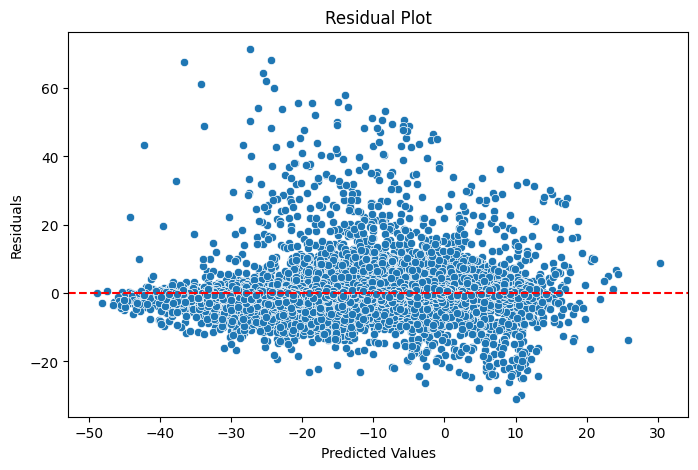

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
y_train_pred = regressor.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
print(f"Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")

Train MAE: 1.19, Test MAE: 1.48
Train RMSE: 2.63, Test RMSE: 3.35


In [ ]:
train_r2 = regressor.score(X_train, y_train)
test_r2 = regressor.score(X_test, y_test)

print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")


Training R²: 0.9445
Testing R²: 0.9103


### XGBoost with Selected Features

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Ensure all categorical columns are encoded
categorical_features = ["Origin Airport", "Carrier Code", "Destination Airport"]

# Encode categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df_new[col])
    label_encoders[col] = le  # Store encoders in case you need them later


# Define features and target
features = ["Day", "Month", "Year", "Taxi-Out time (Minutes)", "Taxi-In time (Minutes)",
            "Origin Airport", "Carrier Code", "Destination Airport",
            "Scheduled Elapsed Time (Minutes)",
            "Scheduled departure hour",
            "Departure delay (Minutes)", "Actual Elapsed Time (Minutes)"]
target = "Arrival Delay (Minutes)"

# Splitting the dataset into train and test sets
X = df_new[features]
y = df_new[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost Model
regressor = XGBRegressor(
    random_state=42,
    n_estimators=1200,  # Keep high for stability
    max_depth=10,  # Slightly reduce tree complexity
    learning_rate=0.01,  # Lower learning rate for fine-tuned updates
    reg_lambda=7,  # Moderate L2 regularization
    reg_alpha=4,  # Stronger L1 regularization to remove noise
    gamma=4,  # Prune unnecessary splits
    subsample=0.85,  # Ensure generalization
    colsample_bytree=0.9  # Use 90% of features per tree
)

# Train the model
regressor.fit(X_train, y_train)

# Evaluate the Model
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

evaluation_results = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "R^2 Score": r2
}

evaluation_results

{'Mean Absolute Error (MAE)': 0.9632331676700873,
 'Mean Squared Error (MSE)': 8.44570992797525,
 'R^2 Score': 0.9325140458226473}

In [ ]:
import pandas as pd
import numpy as np
import joblib
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Ensure all categorical columns are encoded
categorical_features = ["Origin Airport", "Carrier Code", "Destination Airport"]

# Encode categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df_new[col])
    label_encoders[col] = le  # Store encoders in case you need them later

# Define features and target
features = ["Day", "Month", "Year", "Taxi-Out time (Minutes)", "Taxi-In time (Minutes)",
            "Origin Airport", "Carrier Code", "Destination Airport",
            "Scheduled Elapsed Time (Minutes)", "Scheduled departure hour",
            "Departure delay (Minutes)", "Actual Elapsed Time (Minutes)"]
target = "Arrival Delay (Minutes)"

# Splitting the dataset into train and test sets
X = df_new[features]
y = df_new[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost Model
regressor = XGBRegressor(
    random_state=42,
    n_estimators=1200,  # Keep high for stability
    max_depth=20,  # Slightly reduce tree complexity
    learning_rate=0.02,  # Lower learning rate for fine-tuned updates
    reg_lambda=7,  # Moderate L2 regularization
    reg_alpha=4,  # Stronger L1 regularization to remove noise
    gamma=4,  # Prune unnecessary splits
    subsample=0.85,  # Ensure generalization
    colsample_bytree=0.9  # Use 90% of features per tree
)

# Train the model
regressor.fit(X_train, y_train)

# Save the trained model
joblib.dump(regressor, "best_XGB_Regression_model.pkl")

# Evaluate the Model
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

evaluation_results = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "R^2 Score": r2
}

evaluation_results

{'Mean Absolute Error (MAE)': 1.115977787643973,
 'Mean Squared Error (MSE)': 8.744420644143451,
 'R^2 Score': 0.9301271798426971}

In [ ]:
y_train_pred = regressor.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
print(f"Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")

Train MAE: 0.52, Test MAE: 1.12
Train RMSE: 1.20, Test RMSE: 2.96


In [ ]:
train_r2 = regressor.score(X_train, y_train)
test_r2 = regressor.score(X_test, y_test)

print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")

Training R²: 0.9884
Testing R²: 0.9301


                           Arrival Delay (Minutes)  Departure delay (Minutes)
Arrival Delay (Minutes)                     1.0000                     0.4659
Departure delay (Minutes)                   0.4659                     1.0000


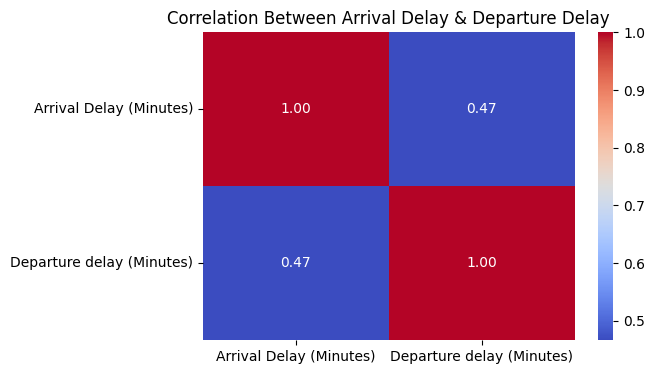

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
correlation = df_new[['Arrival Delay (Minutes)', 'Departure delay (Minutes)']].corr()
print(correlation)

# Visualize correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Arrival Delay & Departure Delay")
plt.show()


In [ ]:
df_new

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),...,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Day,Month,Year,Scheduled departure hour
0,0,2014-01-01,232.0,N013AA,0,2,1900-01-01 19:25:00,1900-01-01 19:24:00,145.0,140.0,...,1900-01-01 20:44:00,145.0,140.0,-6.0,1900-01-01 20:37:00,7.0,1,1,2014,19
1,0,2014-01-01,314.0,N003AA,0,2,1900-01-01 12:45:00,1900-01-01 13:07:00,145.0,133.0,...,1900-01-01 14:20:00,145.0,133.0,10.0,1900-01-01 14:13:00,7.0,1,1,2014,12
2,0,2014-01-01,322.0,N008AA,0,2,1900-01-01 14:05:00,1900-01-01 14:02:00,155.0,144.0,...,1900-01-01 15:26:00,155.0,144.0,-14.0,1900-01-01 15:13:00,13.0,1,1,2014,14
3,0,2014-01-01,338.0,N541AA,0,2,1900-01-01 15:40:00,1900-01-01 15:36:00,150.0,145.0,...,1900-01-01 17:01:00,150.0,145.0,-9.0,1900-01-01 16:56:00,5.0,1,1,2014,15
4,0,2014-01-01,356.0,N530AA,0,2,1900-01-01 16:50:00,1900-01-01 16:44:00,155.0,148.0,...,1900-01-01 18:12:00,155.0,148.0,-13.0,1900-01-01 18:04:00,8.0,1,1,2014,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275401,1,2018-07-10,1958.0,N977AT,4,0,1900-01-01 17:15:00,1900-01-01 17:23:00,131.0,101.0,...,1900-01-01 20:04:00,131.0,101.0,-22.0,1900-01-01 19:57:00,7.0,10,7,2018,17
275402,1,2018-07-10,1973.0,N951AT,4,0,1900-01-01 08:30:00,1900-01-01 08:27:00,119.0,105.0,...,1900-01-01 11:12:00,119.0,105.0,-17.0,1900-01-01 11:07:00,5.0,10,7,2018,8
275403,1,2018-07-10,2009.0,N900DE,4,0,1900-01-01 18:32:00,1900-01-01 18:50:00,129.0,118.0,...,1900-01-01 21:48:00,129.0,118.0,7.0,1900-01-01 21:41:00,7.0,10,7,2018,18
275404,1,2018-07-10,2012.0,N938AT,4,0,1900-01-01 09:40:00,1900-01-01 09:34:00,116.0,98.0,...,1900-01-01 12:12:00,116.0,98.0,-24.0,1900-01-01 12:09:00,3.0,10,7,2018,9


# **PyCaret**

In [ ]:
!pip uninstall -y pycaret scikit-plot scipy
!pip install --no-cache-dir scipy==1.9.3
!pip install --no-cache-dir scikit-plot
!pip install --no-cache-dir pycaret

Found existing installation: scipy 1.14.1
Uninstalling scipy-1.14.1:
  Successfully uninstalled scipy-1.14.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 240.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 225.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.9.3 which is incompatible.
albumentations 2.0.5 requires scipy>=1.10.0, but you have sci

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 159.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 193.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 148.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 244.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 293.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 153.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 121.1 MB/s eta 0:00:00
 

In [ ]:
import pandas as pd
from pycaret.regression import *

# Load the dataset
#file_path = "/content/df_new.csv"  # Adjust the file path if needed
df = df.copy()

# Define the target and features
target = "Arrival Delay (Minutes)"
features = ["Day", "Month", "Year", "Taxi-Out time (Minutes)", "Taxi-In time (Minutes)", "Scheduled Elapsed Time (Minutes)",
            "Origin Airport", "Carrier Code", "Destination Airport",
            "Scheduled departure hour", "Departure delay (Minutes)"]

# Select only the required columns
df = df[features + [target]]

# Initialize PyCaret for regression
exp_reg = setup(data=df, target=target, session_id=123,
    normalize=True, categorical_features=["Origin Airport", "Carrier Code", "Destination Airport"],encoding_method="onehot")


# Save the best model
best_model = compare_models()
save_model(best_model, "best_regression_model")

print("\nBest model saved as 'best_regression_model'.")


,Description,Value
0,Session id,123
1,Target,Arrival Delay (Minutes)
2,Target type,Regression
3,Original data shape,"(275406, 12)"
4,Transformed data shape,"(275406, 20)"
5,Transformed train set shape,"(192784, 20)"
6,Transformed test set shape,"(82622, 20)"
7,Numeric features,8
8,Categorical features,3
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,5.2643,52.3456,7.2348,0.5792,0.6705,0.8301,2.1720
lightgbm,Light Gradient Boosting Machine,5.5776,57.0497,7.5529,0.5414,0.6945,0.8660,5.9840
rf,Random Forest Regressor,5.7253,59.7534,7.7298,0.5197,0.7107,0.8855,86.5940
et,Extra Trees Regressor,5.7157,59.8784,7.7378,0.5187,0.7127,0.8857,77.2710
gbr,Gradient Boosting Regressor,6.1442,67.2644,8.2013,0.4593,0.7275,0.9586,17.0010
br,Bayesian Ridge,6.4293,72.8532,8.5353,0.4144,0.7408,1.0347,0.9250
ridge,Ridge Regression,6.4293,72.8532,8.5353,0.4144,0.7408,1.0347,0.7780
lr,Linear Regression,6.4293,72.8532,8.5353,0.4144,0.7408,1.0347,1.3600
knn,K Neighbors Regressor,6.4305,72.9721,8.5420,0.4135,0.7704,1.0218,15.0620
huber,Huber Regressor,6.4155,73.0257,8.5453,0.4130,0.7427,1.0533,1.1590


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved

Best model saved as 'best_regression_model'.


In [ ]:
print(best_model)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...)


                         Arrival Delay (Minutes)  Origin Airport  \
Arrival Delay (Minutes)                 1.000000       -0.020961   
Origin Airport                         -0.020961        1.000000   
Destination Airport                    -0.089388       -0.145689   

                         Destination Airport  
Arrival Delay (Minutes)            -0.089388  
Origin Airport                     -0.145689  
Destination Airport                 1.000000  


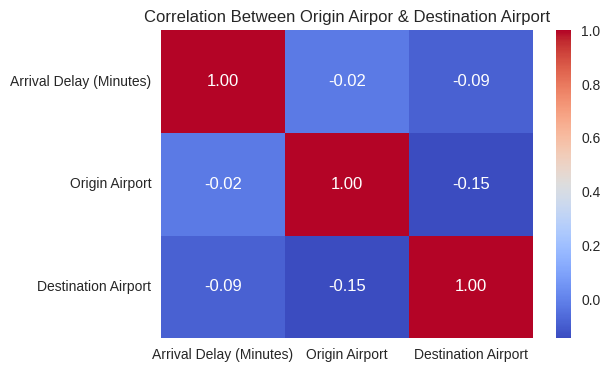

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
correlation = df_new[['Arrival Delay (Minutes)','Origin Airport', 'Destination Airport']].corr()
print(correlation)

# Visualize correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Origin Airpor & Destination Airport")
plt.show()

In [ ]:
from pycaret.regression import load_model, pull, get_config, predict_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load saved model and pipeline
model = load_model("best_regression_model")

target = "Arrival Delay (Minutes)"
features = ["Day", "Month", "Year", "Taxi-Out time (Minutes)", "Taxi-In time (Minutes)", "Scheduled Elapsed Time (Minutes)",
            "Origin Airport", "Carrier Code", "Destination Airport",
            "Scheduled departure hour", "Departure delay (Minutes)"]

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Predict on training data
train_preds_df = predict_model(model, data=X_train)
train_preds = train_preds_df.iloc[:, -1].values  # Last column is prediction

# Predict on test data
test_preds_df = predict_model(model, data=X_test)
test_preds = test_preds_df.iloc[:, -1].values

# Compute metrics
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

# Output results
print(f"📊 PyCaret Model Performance:")
print(f"   🔹 Train MAE: {train_mae:.2f} min")
print(f"   🔹 Test MAE: {test_mae:.2f} min")
print(f"   🔹 Train MSE: {train_mse:.2f}")
print(f"   🔹 Test MSE: {test_mse:.2f}")
print(f"   🔹 Train R²: {train_r2:.2f}")
print(f"   🔹 Test R²: {test_r2:.2f}")


Transformation Pipeline and Model Successfully Loaded
📊 PyCaret Model Performance:
   🔹 Train MAE: 5.08 min
   🔹 Test MAE: 5.28 min
   🔹 Train MSE: 48.79
   🔹 Test MSE: 52.61
   🔹 Train R²: 0.61
   🔹 Test R²: 0.58


# **Deep Learning Model**

📊 Final feature count: 20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - loss: 6.6710 - mae: 6.6710 - mse: 78.2886 - val_loss: 5.7177 - val_mae: 5.7177 - val_mse: 60.9327 - learning_rate: 0.0010
Epoch 2/100
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 5.9794 - mae: 5.9794 - mse: 65.3471 - val_loss: 5.5034 - val_mae: 5.5034 - val_mse: 57.6550 - learning_rate: 0.0010
Epoch 3/100
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 5.7990 - mae: 5.7990 - mse: 62.2012 - val_loss: 5.4305 - val_mae: 5.4305 - val_mse: 56.0853 - learning_rate: 0.0010
Epoch 4/100
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 5.7490 - mae: 5.7490 - mse: 61.5147 - val_loss: 5.4537 - val_mae: 5.4537 - val_mse: 56.5786 - learning_rate: 0.0010
Epoch 5/100
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 5.7114 - mae: 5.7114 - mse: 60.8588 - val_loss: 5.3620 - val_mae: 5.3620 - val_mse: 55.3467 - learning_rate: 0.0010
Epoch 6/100
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 5.6757 - mae: 5.6757 - mse: 60.1937 

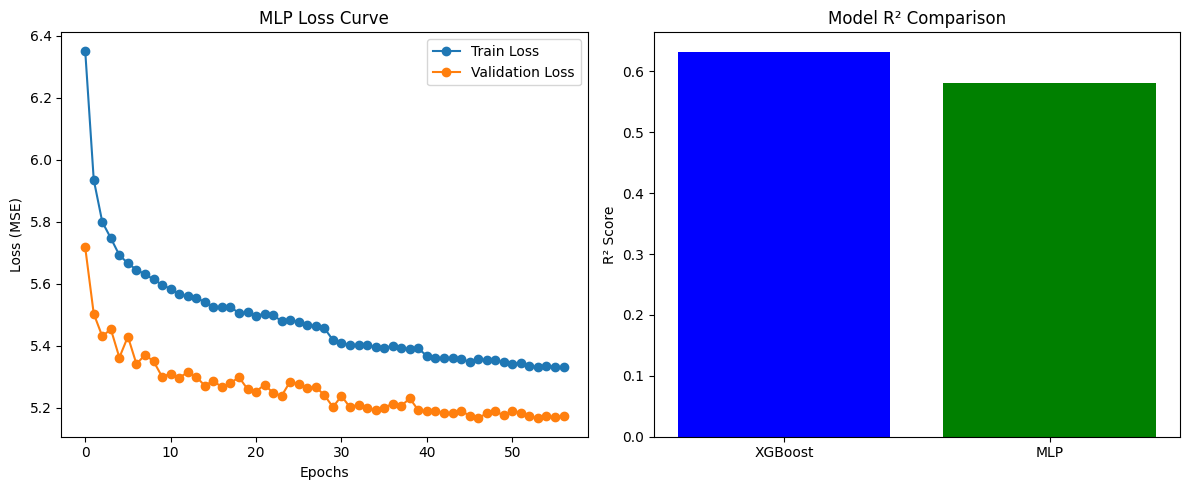

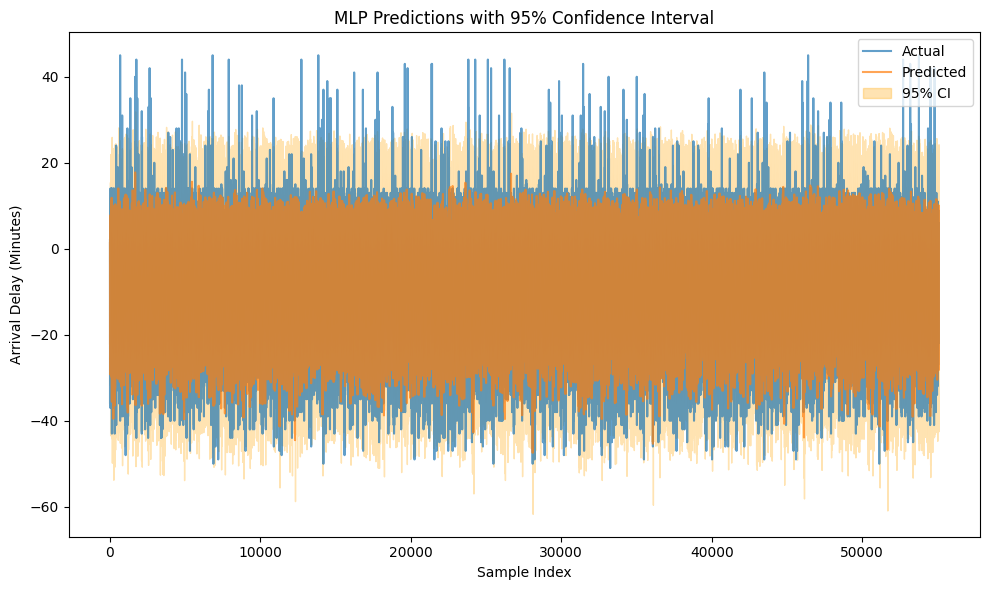

In [ ]:
import pandas as pd
import numpy as np
import joblib
import xgboost as xgb
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import LeakyReLU

# Define Features & Target
target = "Arrival Delay (Minutes)"
features = ["Day", "Month", "Year", "Taxi-Out time (Minutes)", "Taxi-In time (Minutes)",
            "Origin Airport", "Carrier Code", "Destination Airport",
            "Scheduled Elapsed Time (Minutes)",
            "Scheduled departure hour", "Departure delay (Minutes)"]

df = df[features + [target]].dropna()  # Drop missing values

# ✅ One-Hot Encode Categorical Features
categorical_features = ["Origin Airport", "Carrier Code", "Destination Airport"]
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_cats = encoder.fit_transform(df[categorical_features])
joblib.dump(encoder, "encoder.pkl")

# ✅ Standardize Numerical Features
numerical_features = ["Day", "Month", "Year", "Taxi-Out time (Minutes)", "Taxi-In time (Minutes)",
                      "Scheduled Elapsed Time (Minutes)",
                      "Scheduled departure hour", "Departure delay (Minutes)"]

scaler = StandardScaler()
scaled_numerics = scaler.fit_transform(df[numerical_features])
joblib.dump(scaler, "scaler.pkl")

# ✅ Combine Features
X = np.hstack((scaled_numerics, encoded_cats))
y = df[target].values

print(f"📊 Final feature count: {X.shape[1]}")  # Debugging feature count

# ✅ Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train MLP (Neural Network) with improvements
mlp_model = Sequential([
    Dense(256, kernel_initializer=HeNormal(), input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),  # Reduced from 0.3

    Dense(128, kernel_initializer=HeNormal()),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.15),  # Reduced from 0.2

    Dense(64, kernel_initializer=HeNormal()),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),

    Dense(32, kernel_initializer=HeNormal()),
    LeakyReLU(alpha=0.1),

    Dense(1)  # Output Layer
])

# Compile with MAE loss and lower LR
mlp_model.compile(optimizer=AdamW(learning_rate=0.001, weight_decay=1e-5),
                  loss="mae",  # Optimize MAE directly
                  metrics=["mae", "mse"])

# ✅ Callbacks for improved convergence
callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-5, verbose=1)
]

# ✅ Train longer with smart control
history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,  # Longer training
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# Save Keras model in a compatible format
mlp_model.save("mlp_model.keras")
# ✅ Evaluate Models
xgb_pred = xgb_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test).flatten()

xgb_mae = mean_absolute_error(y_test, xgb_pred)
mlp_mae = mean_absolute_error(y_test, mlp_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
mlp_r2 = r2_score(y_test, mlp_pred)

print(f"📉 XGBoost MAE: {xgb_mae:.2f}, R²: {xgb_r2:.2f}")
print(f"📉 MLP Neural Network MAE: {mlp_mae:.2f}, R²: {mlp_r2:.2f}")

# ✅ 95% Confidence Interval for MLP
residuals = y_test - mlp_pred
residual_std = np.std(residuals)
ci_upper = mlp_pred + 1.96 * residual_std
ci_lower = mlp_pred - 1.96 * residual_std

print(f"📉 Residual Std Dev: {residual_std:.2f}")
print(f"📉 95% Confidence Interval Range: ±{1.96 * residual_std:.2f} min")

# ✅ Plot Training Loss & Validation Loss
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('MLP Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# R² Comparison Plot
plt.subplot(1, 2, 2)
models = ['XGBoost', 'MLP']
r2_scores = [xgb_r2, mlp_r2]
plt.bar(models, r2_scores, color=['blue', 'green'])
plt.title('Model R² Comparison')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

# ✅ Plot Prediction with 95% Confidence Interval
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', alpha=0.7)
plt.plot(mlp_pred, label='Predicted', alpha=0.7)
plt.fill_between(np.arange(len(y_test)), ci_lower, ci_upper, color='orange', alpha=0.3, label='95% CI')
plt.title('MLP Predictions with 95% Confidence Interval')
plt.xlabel('Sample Index')
plt.ylabel('Arrival Delay (Minutes)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Updated MAPE function to handle zero values safely
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0  # Ignore zero values in y_true
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100 if np.any(mask) else np.inf

# ✅ Predictions on Training & Test Data
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)

mlp_train_pred = mlp_model.predict(X_train).flatten()
mlp_test_pred = mlp_model.predict(X_test).flatten()

# ✅ Calculate MAE (Mean Absolute Error)
xgb_train_mae = mean_absolute_error(y_train, xgb_train_pred)
xgb_test_mae = mean_absolute_error(y_test, xgb_test_pred)

mlp_train_mae = mean_absolute_error(y_train, mlp_train_pred)
mlp_test_mae = mean_absolute_error(y_test, mlp_test_pred)

# ✅ Calculate R² Scores
xgb_train_r2 = r2_score(y_train, xgb_train_pred)
xgb_test_r2 = r2_score(y_test, xgb_test_pred)

mlp_train_r2 = r2_score(y_train, mlp_train_pred)
mlp_test_r2 = r2_score(y_test, mlp_test_pred)

# ✅ Calculate MAPE (Mean Absolute Percentage Error) with zero handling
xgb_train_mape = mean_absolute_percentage_error(y_train, xgb_train_pred)
xgb_test_mape = mean_absolute_percentage_error(y_test, xgb_test_pred)

mlp_train_mape = mean_absolute_percentage_error(y_train, mlp_train_pred)
mlp_test_mape = mean_absolute_percentage_error(y_test, mlp_test_pred)

# ✅ Print the Results
print(f"📊 **XGBoost Performance:**")
print(f"   - Train MAE: {xgb_train_mae:.2f} min")
print(f"   - Test MAE: {xgb_test_mae:.2f} min")
print(f"   - Train R²: {xgb_train_r2:.2f}")
print(f"   - Test R²: {xgb_test_r2:.2f}")
print(f"   - Train MAPE: {xgb_train_mape:.2f} %")
print(f"   - Test MAPE: {xgb_test_mape:.2f} %")

print(f"\n📊 **MLP Neural Network Performance:**")
print(f"   - Train MAE: {mlp_train_mae:.2f} min")
print(f"   - Test MAE: {mlp_test_mae:.2f} min")
print(f"   - Train R²: {mlp_train_r2:.2f}")
print(f"   - Test R²: {mlp_test_r2:.2f}")
print(f"   - Train MAPE: {mlp_train_mape:.2f} %")
print(f"   - Test MAPE: {mlp_test_mape:.2f} %")

6886/6886 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
📊 **XGBoost Performance:**
   - Train MAE: 3.67 min
   - Test MAE: 4.90 min
   - Train R²: 0.79
   - Test R²: 0.63
   - Train MAPE: 58.24 %
   - Test MAPE: 77.69 %

📊 **MLP Neural Network Performance:**
   - Train MAE: 5.11 min
   - Test MAE: 5.17 min
   - Train R²: 0.58
   - Test R²: 0.58
   - Train MAPE: 83.91 %
   - Test MAPE: 85.56 %
